# Medical Cost Personal Insurance Project

# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

The dataset includes 1338 rows x 7 columns. The columns are the features related to each person.

Features in the Medical Cost Personal Insurance Dataset:


•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


# Predict

 insurance costs

In [46]:
# Import necessary libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Read the insurance.csv data file.
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
     

In [48]:
# First 5 elements of insurance data.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
# Last 5 elements of insurance data.
data.tail()
     

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [50]:
# Check the shape of the dataset.
data.shape
     

(1338, 7)

There are 1338 rows x 7 columns in our dataset

In [51]:
# Inspect the properties of the dataset.
data.describe().T
     

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


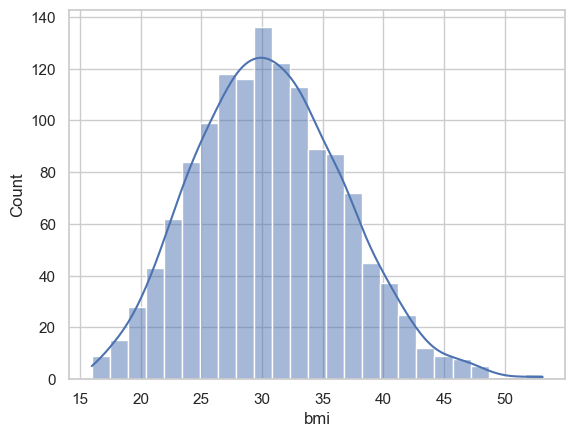

In [52]:
# Distribution of BMI with respect to charges by scatter plot.
distribution_bmi = sns.set(style="whitegrid")
distribution_bmi = sns.histplot(data=data, x="bmi", kde=True)

In [53]:
# Check is there any null data.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# It is observed that there is no empty data in the dataset.
     


# Outlier Detection



Outlier is a data point that is significantly far from other data points in the dataset.

In order to find the outliers, IQR (Inter-quartile Range) Rule is used.

IQR = Q3 - Q1
Q3: Percentile75
Q1: Percentile25
Lower Boundary: The minimum value data points
Lower Boundary = Q1 - 1.5 * IQR
Upper Boundary: The maximum value data points
Upper Boundary = Q3 + 1.5 * IQR
Data points that are not in the range that is specified by lower boundary and upper boundary are called as Outliers.

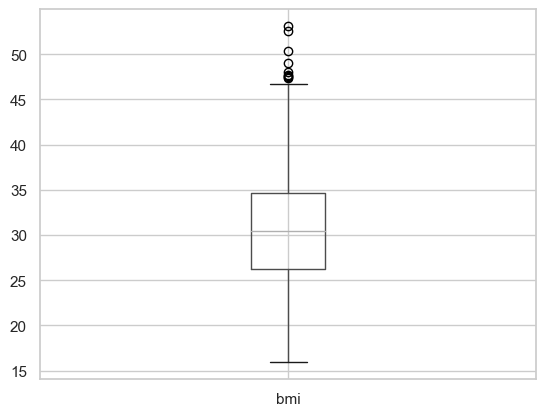

In [54]:
# Check is there any outliers in the bmi.
data.boxplot(column=["bmi"]);

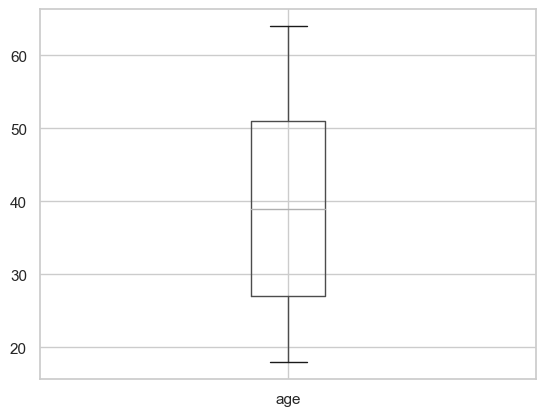

In [55]:
# Check is there any outliers in the age.
data.boxplot(column=["age"]);

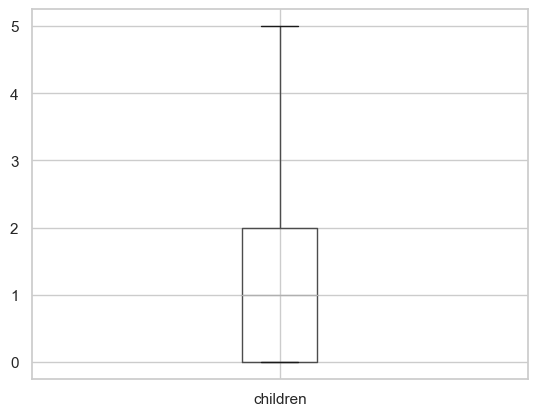

In [56]:
# Check is there any outliers in the children.
data.boxplot(column=["children"]);
     

# Remove Outliers

In [57]:
# Define Q1 and Q3 by using 25% and 75% Quantiles.
Q1 = data["bmi"].quantile(0.25)
Q3 = data["bmi"].quantile(0.75)
# Define IQR as the difference of Q3 and Q1.
IQR = Q3 - Q1
# Define Lower Boundary and Upper Boundary.
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

In [58]:
# In order to find the index of outliers, define a list.
# This list contains row numbers of outliers.
outliers_list = data.index[ (data["bmi"] < lower_boundary) | (data["bmi"] > upper_boundary) ]
# Create an empty list that stores indices of outliers.
outliers_index = []
outliers_index.extend(outliers_list)
     

In [59]:
# Indices of outliers
outliers_index

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

In [60]:
# Create a new dataset that is cleaned from rows of outliers.
outliers_index = sorted(set(outliers_index))
data_cleaned = data.drop(outliers_index)
     


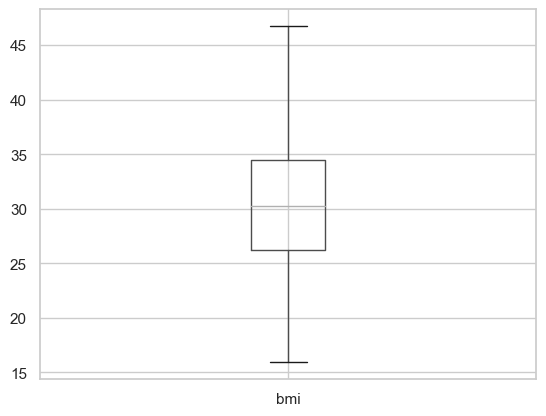

In [61]:
# New dataset has no outliers.
data_cleaned.boxplot(column=["bmi"]);

In [62]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
# 9 rows belong to outliers are remowed from the dataset
data_cleaned.shape

(1329, 7)

In [64]:
# show_corr function that results a barplot.
# Shows correlations from highest to lowest. 
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
       
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title(" Correlation of features with {}".format(target_name))
     

# Correlation Graphs



Correlation Graph Of:

1.Smoker and Charges

2.Smoker and Region

3.BMI and Sex

4.Age and BMI

5.BMI and Children

6.BMI and Charges

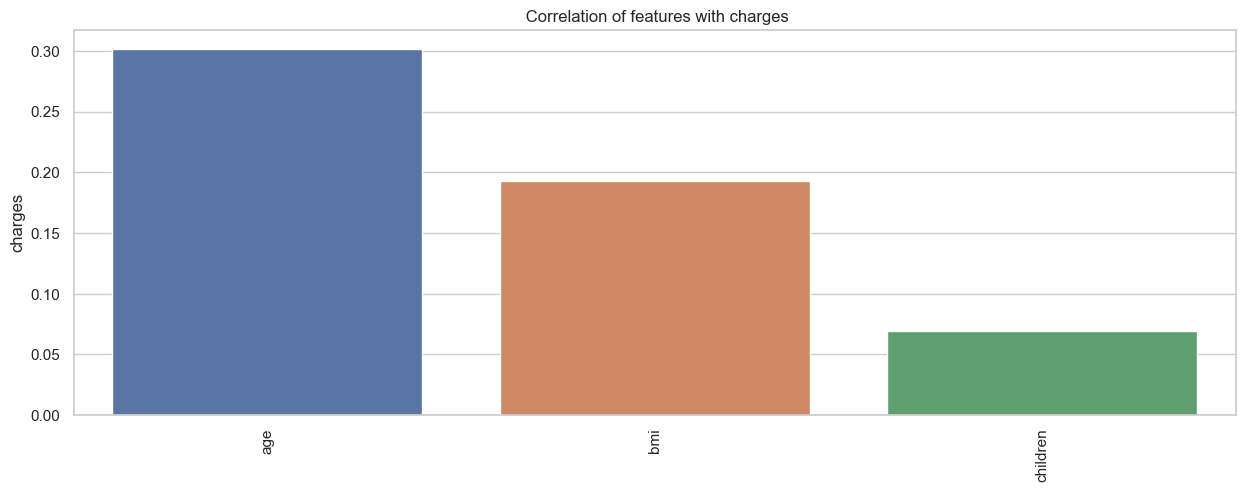

In [65]:
# Correlation of all features when charges feature is target
show_corr(dataset=data_cleaned, target_name='charges')

In [66]:
# New dataset with cleaned from outliers is created as .csv file
data_cleaned.to_csv("insurance_cleaned.csv", index=False)
     


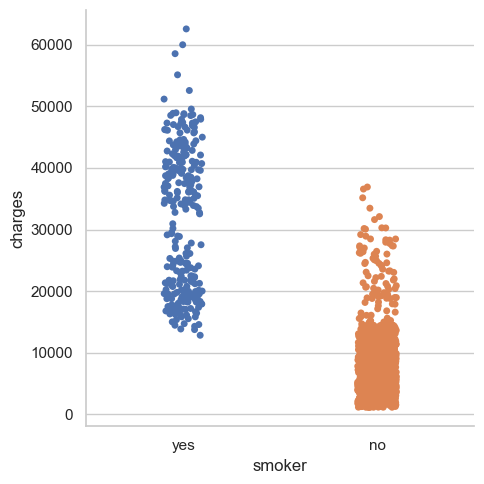

In [67]:
# Correlation between smoker and charges.
corr_smoker_charges = sns.catplot(x="smoker", y="charges", data=data_cleaned)
     

In [68]:
# Correlation between region and smoker.
corr_region_smoker = data_cleaned.groupby(["region", "smoker"]).size().reset_index(name="Number of People")
corr_region_smoker
     

,region,smoker,Number of People
0,northeast,no,256
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,268
5,southeast,yes,89
6,southwest,no,267
7,southwest,yes,57


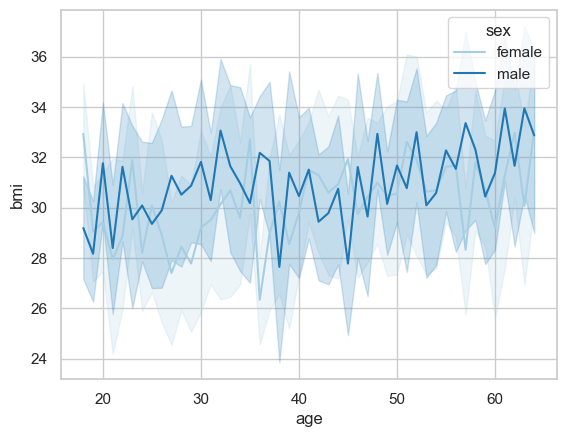

In [69]:
# Correlation between bmi and sex.
corr_bmi_sex = sns.lineplot(x="age", y="bmi", hue="sex", data=data_cleaned, palette="Paired")

In [70]:
# Number of childrens for each region.
num_children = data_cleaned.groupby("region")["children"].sum()
num_children

region
northeast    337
northwest    373
southeast    378
southwest    369
Name: children, dtype: int64

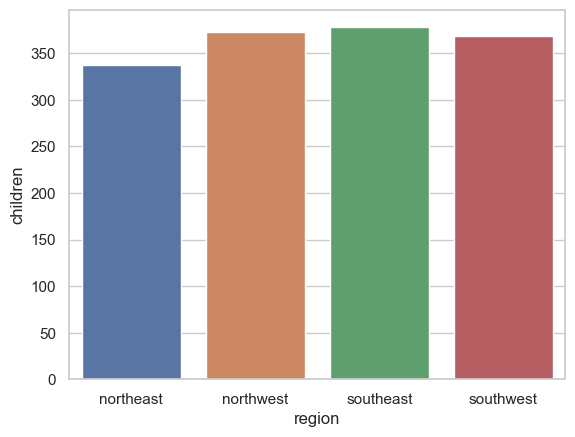

In [71]:
# Create a bar plot that shows the number of childrens with respect to regions
num_children_bar = sns.barplot(x = num_children.index, y = num_children)
     

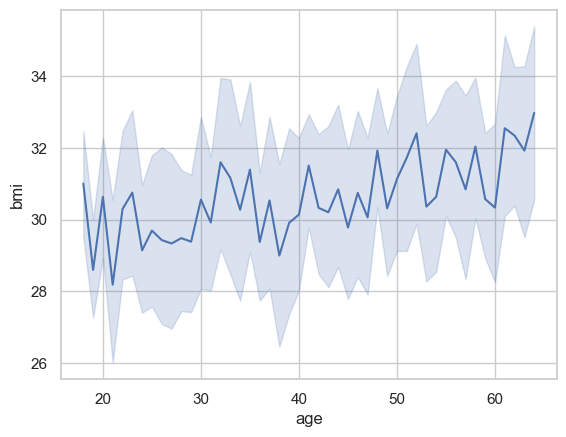

In [72]:
# Correlation between age and bmi.
corr_age_bmi = sns.lineplot(x="age", y="bmi", data=data_cleaned)

In [73]:
# Correlation between bmi and children.
corr_bmi_children = data_cleaned.groupby(["children"])["bmi"].describe()
corr_bmi_children
     


,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,571.0,30.448809,5.887124,15.960,26.12500,30.3000,34.550,46.20
1,320.0,30.386500,5.752371,16.815,26.55250,29.9225,34.200,46.53
2,238.0,30.836450,6.349372,16.815,25.75875,31.4500,35.275,46.70
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.320,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.660,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.055,46.75


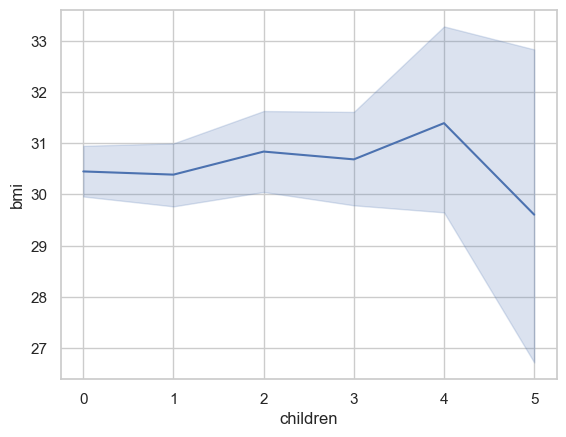

In [74]:
# Line plot of bmi vs children.
line_bmi_children = sns.lineplot(x="children", y="bmi", data=data_cleaned)
     

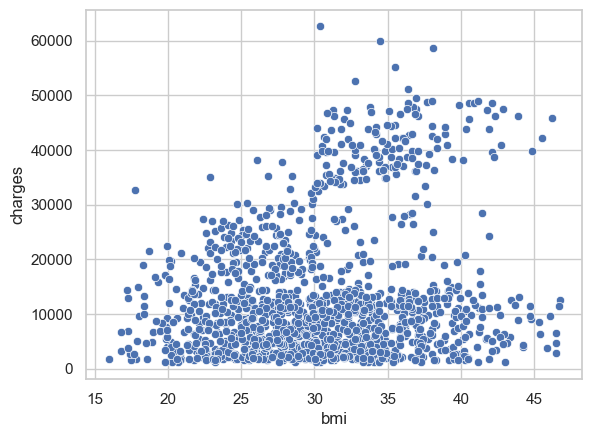

In [75]:
# Correlation between bmi and charges.
corr_bmi_charges = sns.scatterplot(x="bmi", y="charges" ,data=data_cleaned)
     

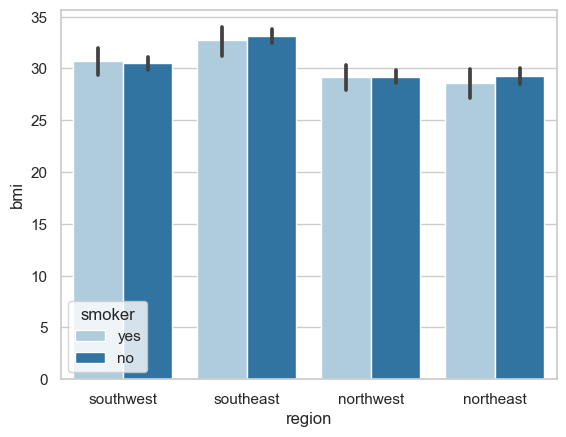

In [76]:
# Correlation between region, smoker and bmi.
corr_region_smoker_bmi = sns.barplot(x="region", y="bmi", hue="smoker", data=data_cleaned, palette="Paired")

<AxesSubplot:>

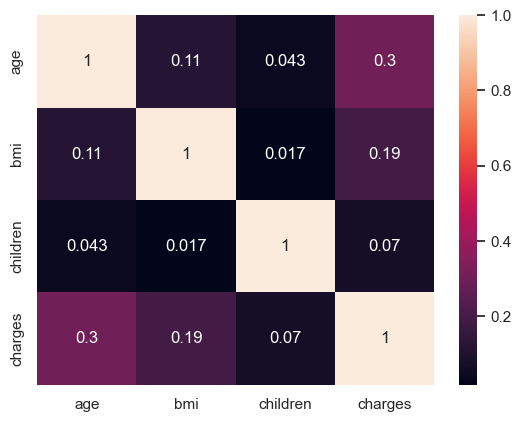

In [77]:
sns.heatmap(data_cleaned.corr(), annot = True)
     

# One-Hot Encoding Technique



In [78]:
# One-Hot Encoding via using get_dummies.
data_encoded = pd.get_dummies(data_cleaned, columns = ["sex", "smoker", "region"])
data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [79]:
data_encoded.corr()
data_cleaned.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


# Train and Test Data



In [80]:
X = data_encoded.drop("charges", axis=1)
y = data_encoded.loc[:, "charges"]

# Split the dataset into train and test sets with 70-30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3)
     

In [81]:
# Convert y_train and y_test to pandas DataFrame.
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [82]:
# Check all of the data are pandas DataFrame.
print(f"X_train type: {type(X_train)}\nX_test type: {type(X_test)}\ny_train type: {type(y_train)}\ny_test type: {type(y_test)}")
     

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.frame.DataFrame'>
y_test type: <class 'pandas.core.frame.DataFrame'>


# Scaling the Dataset

.Data points can be far away from each other.

.Scaling is used to make data points closer to each other.

.Data points become more generalized by being closer.


In [83]:
# Scale dataset to normalize.
scaler_func = MinMaxScaler()
data_list = ["X_train", "X_test", "y_train", "y_test"]
data_list_index = 0
for index in [X_train, X_test, y_train, y_test]:
  scaler_func.fit_transform(index)
  print(f"Min {data_list[data_list_index]}:", scaler_func.data_min_)
  print(f"Max {data_list[data_list_index]}:",scaler_func.data_max_)
  data_list_index += 1

Min X_train: [18.   15.96  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
Max X_train: [64.   46.75  5.    1.    1.    1.    1.    1.    1.    1.    1.  ]
Min X_test: [18.    17.385  0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
Max X_test: [64.  46.7  5.   1.   1.   1.   1.   1.   1.   1.   1. ]
Min y_train: [1121.8739]
Max y_train: [62592.87309]
Min y_test: [1131.5066]
Max y_test: [52590.82939]


# Model Selection and Performance Comparison

In [84]:
# Create an object using the LinearRegression() class.
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth = 3)
random_forest_model = RandomForestRegressor(max_depth = 4, n_estimators=500)
gradient_boosting_model = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate =.2)
ada_boost_regressor_model = AdaBoostRegressor(n_estimators=50, learning_rate =.01)

In [85]:
# Create a list that contains the regression models.
regression_models = [("Linear Regression", linear_regression_model),
                     ("Decision Tree", decision_tree_model),
                     ("Random Forest", random_forest_model),
                     ("Gradien Boosting", gradient_boosting_model),
                     ("Ada Boost Regressor", ada_boost_regressor_model)]
     

In [86]:
# Create a list that contains r2 scores of the models.
r2_scores = []

In [87]:
# Create a for loop to check cross validation scores of the regression models.
for regression_name, regression_model in regression_models:
  cross_validation_scores = cross_val_score(regression_model, X_train, y_train.values.ravel(), scoring="r2")
  r2_scores.append(cross_validation_scores.mean()*100)

  print(f"r2 score of {regression_name}: ", str(round(sum(cross_validation_scores)/5*100,4)), "%\n")
     

r2 score of Linear Regression:  73.1783 %

r2 score of Decision Tree:  83.1736 %

r2 score of Random Forest:  84.1168 %

r2 score of Gradien Boosting:  81.5475 %

r2 score of Ada Boost Regressor:  83.8068 %



Best performing model: Random Forest

# Hyper-parameter Optimization



In [88]:
# Create a new Random Forest model.

best_model_rand_forest = RandomForestRegressor()

rand_forest_parameters = [{"max_depth": [2, 3, 4, 5, 6],
                           "n_estimators": [400, 500, 600]}]  

rand_forest_gridCV = GridSearchCV(best_model_rand_forest, 
                                  rand_forest_parameters,
                                  cv = 5,
                                  n_jobs = -1)
# Train the model
rand_forest_gridCV.fit(X_train, y_train.values.ravel())
# Get the best parameters for Random Forest Regressor
print(rand_forest_gridCV.best_params_)
print(rand_forest_gridCV.best_score_)

{'max_depth': 3, 'n_estimators': 600}
0.8420006128652835


# Results of Hyper-Parameter Optimization

# Evaluation of the Model



.Root Mean Squared Error (RMSE)

.Root Mean Absolute Error (RMAE)
r2 Score


Evaluate these results by using the best parameters found by using Hyper-Parameter Optimization



In [89]:
RMSE = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (RMSE, 3))

RMAE = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (RMAE, 3))

r2 = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "r2").mean()
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")
     

Mean Squared Error of XGBoost: (array([-31025886.78023351, -17251269.04494403, -24968309.3512273 ,
       -23764732.37024507, -18924627.51320373]), 3)
Mean Absolute Error of XGBoost: (array([-3067.317431  , -2472.29173014, -2861.15990094, -2774.92366221,
       -2615.93878314]), 3)
r2 Score of XGBoost: 84.1917%

